In [110]:
from math import pi
import numpy as np


def f1(x):
    x1 = x[0]
    if x1>pi or x1<-pi:
        x1 = 1000000*abs(x1)
    return x1

def f2(x):
    x1, x2, x3 = x[0], x[1], x[2] 
    if x1>pi or x1<-pi or x2>5 or x2<-5 or x3>5 or x3<-5:
        return 100000*(1-(1/(1*pi*pi))*(abs(x[0])+pi)**2+abs(abs(x[1])-5*np.cos(abs(x[0])))**(1/3)+abs(abs(x[2])-5*np.sin(abs(x[0])))**(1/3))
    else:
        return 1-(1/(1*pi*pi))*(x[0]+pi)**2+abs(x[1]-5*np.cos(x[0]))**(1/3)+abs(x[2]-5*np.sin(x[0]))**(1/3)


In [111]:
import random
n = 140
x1 = np.random.uniform(-pi, pi, n)
x2 = np.random.uniform(-5, 5, n)
x3 = np.random.uniform(-5, 5, n)

In [112]:
import pandas as pd
x = pd.DataFrame({'x1': x1,
                  'x2': x2,
                  'x3': x3 })                     

x["f1"] = x.apply(f1,1)
x["f2"] = x.apply(f2,1)

In [113]:
best_bird1 = x[["f1"]].idxmin()
best_bird2 = x[["f2"]].idxmin()

In [114]:
for k in range(1000):
    for i in range(n):
        sigma_a = max(abs(x["x1"][i].item()-x["x1"][best_bird1].item()),abs(x["x1"][i].item()-x["x1"][best_bird2].item()))
        sigma_b = max(abs(x["x2"][i].item()-x["x2"][best_bird1].item()),abs(x["x2"][i].item()-x["x2"][best_bird2].item()))
        sigma_c = max(abs(x["x3"][i].item()-x["x3"][best_bird1].item()),abs(x["x3"][i].item()-x["x3"][best_bird2].item()))

        test_a = np.random.normal( (x["x1"][i].item()+x["x1"][best_bird1].item()+x["x1"][best_bird2].item())/3 , sigma_a)
        test_b = np.random.normal( (x["x2"][i].item()+x["x2"][best_bird1].item()+x["x2"][best_bird2].item())/3 , sigma_b)
        test_c = np.random.normal( (x["x3"][i].item()+x["x3"][best_bird1].item()+x["x3"][best_bird2].item())/3 , sigma_c)
        
        test_z1 = f1([test_a])
        test_z2 = f2([test_a,test_b,test_c])
        
        if  test_z1 <= x["f1"][i].item() and test_z2 <= x["f2"][i].item() :
            x["x1"][i] = test_a
            x["x2"][i] = test_b
            x["x3"][i] = test_c
            x["f1"][i] = test_z1
            x["f2"][i] = test_z2
            
            
    best_bird1 = x[["f1"]].idxmin()
    best_bird2 = x[["f2"]].idxmin()

    
        
        
        

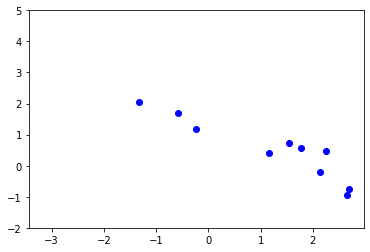

In [117]:
import matplotlib.pyplot as plt

plt.plot(x["f1"],x["f2"],"bo")
plt.ylim([-2, 5])
plt.show()